**Nombre:** Agustin Paturlanne
# Parte 1
## Enunciado asignado
**Enunciado 2:** Enunciado 2: dado el archivo de registros de jugadas (eventos) de MemPy, mostrar un gráfico con la duración (en tiempo) de las partidas que se juegan los lunes.

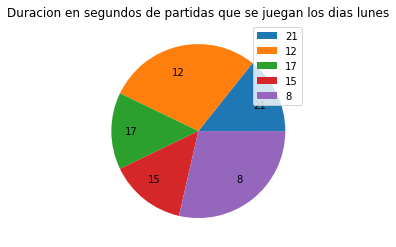

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from datetime import datetime

df = pd.read_csv(os.path.join(os.getcwd(),'datos.csv'))
df.rename(columns={'Estado ':'Estado'}, inplace=True)

#Me quedo solo con las columnas de inicio Y fin para luego restar los tiempos
partidas = df[df['Nombre de evento'].str.contains('inicio_partida|fin')] 
#Filtro solo para dias lunes (lunes == 0)
partidas = partidas[partidas["Tiempo"].apply(lambda x:datetime.fromtimestamp(x).weekday() == 2)] 
#Agrupo por partida y resto segun columna tiempo el elemento con su fila previa (tiempo fin - tiempo inicio)
partidas["Tiempo"] = partidas.groupby("Partida")["Tiempo"].diff()
#Elimino filas que quedaron con valor NaN debido a la resta
partidas = partidas[partidas["Tiempo"].isnull() == False]
#Casteo los valores a int
partidas["Tiempo"] = partidas["Tiempo"].astype(int)
#Cuento la cantidad de personas para los tiempos repetidos
#Ej si una persona tardo 10 seg y otras dos personas tardaron ambas 12 segundos entonces en el grafico de tortas sera mayor la porcion de los 12 segundos que la de los 10seg
datos = partidas.groupby("Tiempo").count()["Partida"].values
#En caso de tiempos repetidos, saco los duplicados para poder representarlos como uno dentro del grafico
etiquetas = partidas["Tiempo"].drop_duplicates().values

plt.pie(datos,labels=etiquetas,labeldistance=0.7)
plt.legend(etiquetas)
plt.title("Duracion en segundos de partidas que se juegan los dias lunes")
plt.show()


-Notar que en los datos de prueba subidos por la cátedra las partidas fueron jugadas los días **martes**, y en mi enunciado tengo que hacer el analisis segun partidas jugadas los lunes, asique habrá que agregar al csv partidas de lunes o probar con el numero del dia martes (osea con weekday() == 2).

# Parte 2

## Criterio elegido

Dataset: Video Games Sales 
(https://www.kaggle.com/gregorut/videogamesales)

Criterio: Nombre de juegos que se produjeron por Nintendo y de genero Accion.

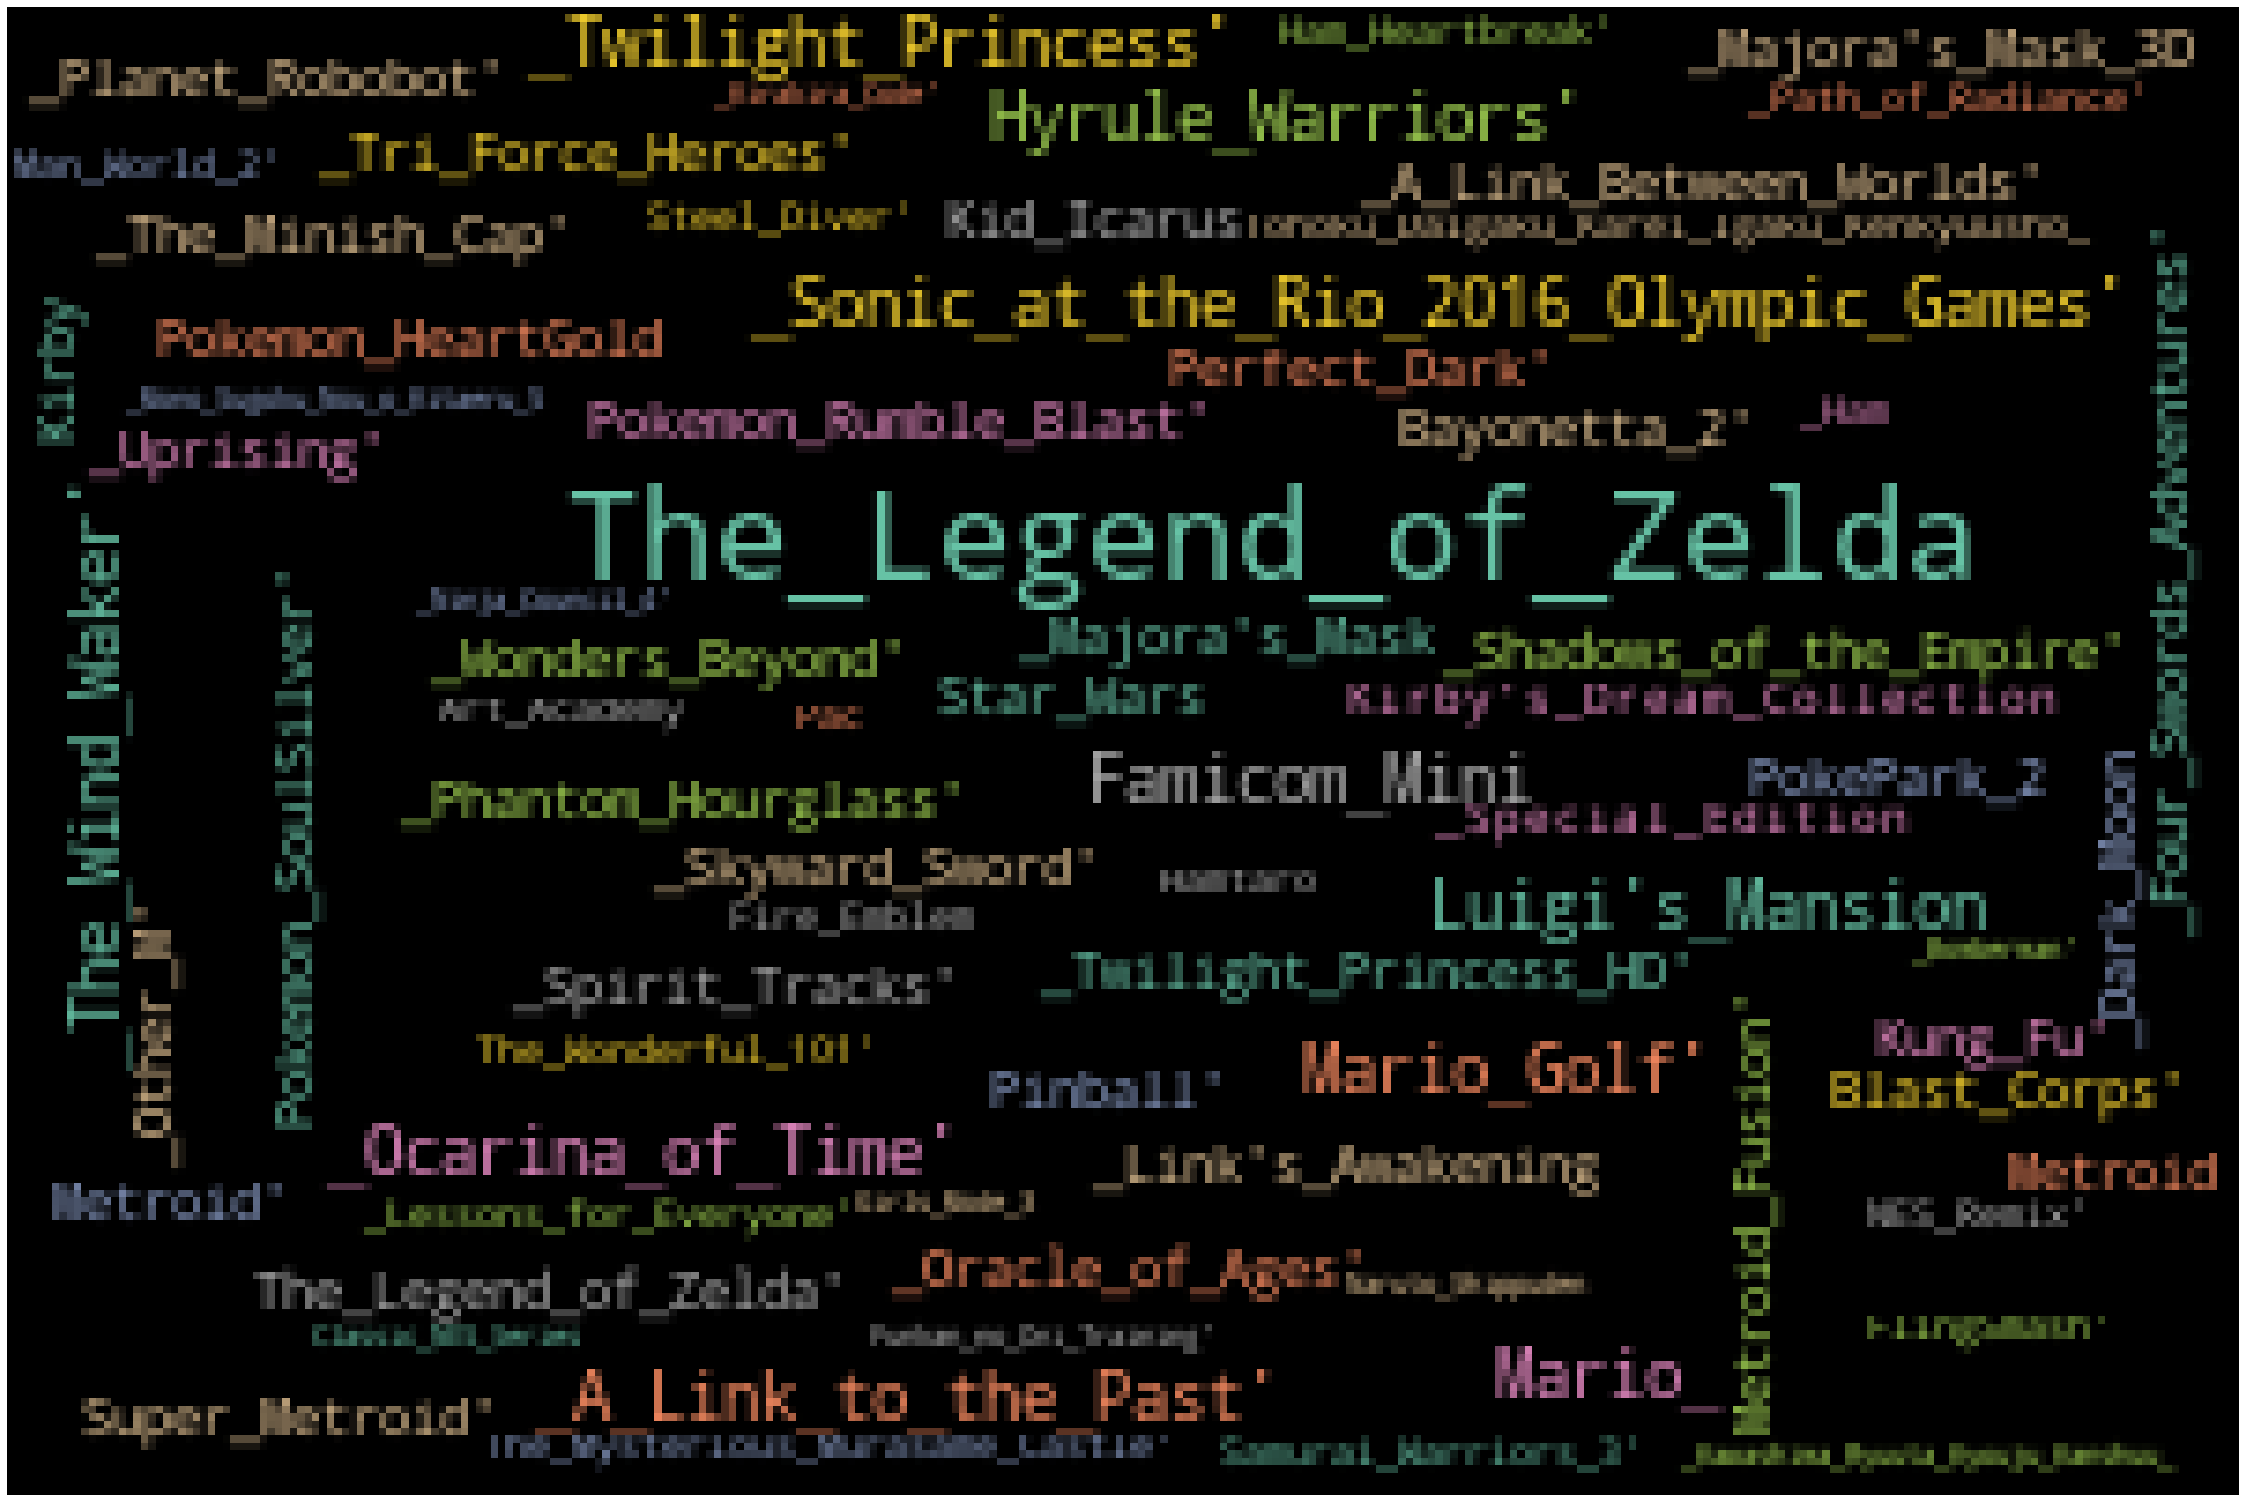

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

def plot_cloud(wordcloud):
  """
  Crea la figura de wordcloud
  """
  plt.figure(figsize=(40, 30))
  plt.imshow(wordcloud)
  plt.axis("off")

df = pd.read_csv(os.path.join(os.getcwd(),'vgsales.csv'))

df = df[df["Publisher"] == "Nintendo"]
df = df[df["Genre"] == "Action"]

palabras = df["Name"].values

text = str([c.replace(' ','_') for c in palabras])

wordcloud = WordCloud(width = 300,height = 200,random_state=1,colormap='Set2',collocations=False).generate(text)

plot_cloud(wordcloud)
plt.show()